In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [32]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [41]:
income = y[X['occupation'] == '?']['income']
((income =='<=50K') | (income ==  '<=50K.')).mean()

0.8963646228974498

In [46]:
cols = X.columns

#### Missing Values

In [61]:
# finds all rows that has a "?" or missing values, then filters dataframe to get rows that do not have those values
has = ~(X['age'] == X['age'])
for col in cols:
    has = ((has) | (X[col] =='?') | (X[col].isna()))

X[~has]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


<Axes: xlabel='education-num', ylabel='Count'>

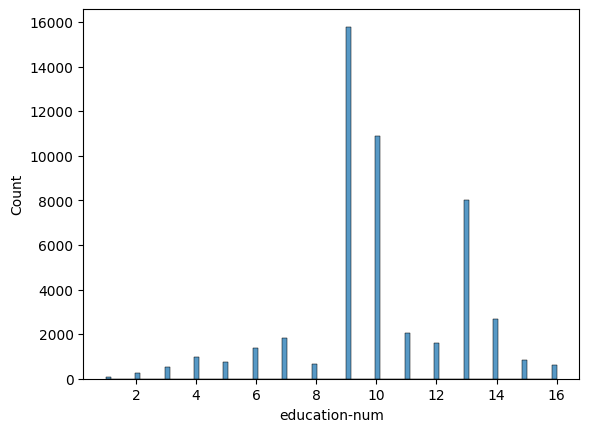

In [17]:
sns.histplot(data = X, x = 'education-num')

In [ ]:
sns.histplot(data = X, x = 'age')

<Axes: xlabel='hours-per-week', ylabel='Count'>

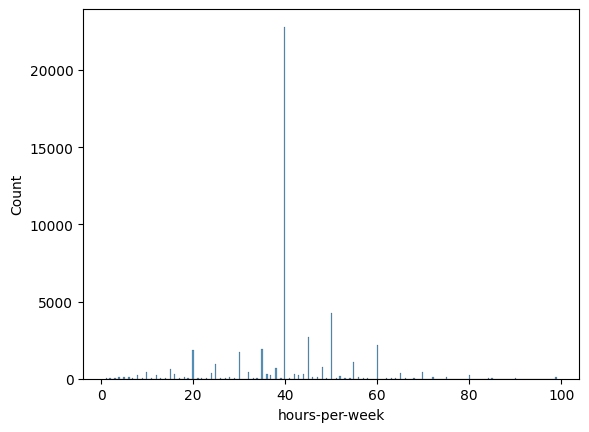

In [6]:
sns.histplot(data = X, x = 'hours-per-week')

In [9]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [13]:
X['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [18]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [24]:
df_encoded = pd.get_dummies(X, columns=['workclass', 'education'])
df_encoded

,age,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,False,False,False,True,False,False,False,False,False,False
1,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,False,False,False,True,False,False,False,False,False,False
2,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
3,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,False,False,False,False,False,False,False,False,False,False
4,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,...,False,False,False,True,False,False,False,False,False,False
48838,64,321403,9,Widowed,NaN,Other-relative,Black,Male,0,0,...,False,False,False,False,False,True,False,False,False,False
48839,38,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,...,False,False,False,True,False,False,False,False,False,False
48840,44,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,...,False,False,False,True,False,False,False,False,False,False
